# Habituation Dishabituation - Individual PSTH Analysis

- From all mice, look at different onsets of investigations and the associated response

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from experiment_class import Experiment
from bouts_extension import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# NAc
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac_csvs"
# brain_region = '#15616F'


# mPFC
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc_csvs"
brain_region = '#FFAF00'

In [3]:
experiment = Experiment(experiment_path, csv_base_path)

experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p1-240516-064158\Notes.txt
read from t=0s to t=1547.64s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p2-240516-071921\Notes.txt
read from t=0s to t=1556.22s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p3-240516-075659\Notes.txt
read from t=0s to t=1538.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p5-240821-092649\Notes.txt
read from t=0s to t=1326.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p6-240821-103616\Notes.txt
read from t=0s to t=1322.66s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\

In [4]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]
experiment.group_extract_manual_annotations(bout_definitions,first_only=False)

Processing behaviors for p1-240516-064158...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...
Processing behaviors for p5-240821-092649...
Processing behaviors for p6-240821-103616...
Processing behaviors for p7-240821-111323...
Processing behaviors for p8-240821-121933...
Processing behaviors for pp1-250115-080205...
Processing behaviors for pp2-250115-083739...
Processing behaviors for pp3-250115-091306...
Processing behaviors for pp4-250115-094555...
Processing behaviors for pp5-250114-053943...
Processing behaviors for pp6-250114-061037...
Processing behaviors for pp7-250114-070021...
Processing behaviors for pp8-250114-080316...


In [5]:
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=True,
                                  max_bout_duration=10, 
                                  mode='standard')


Computing DA metrics for p1-240516-064158 ...
Computing DA metrics for p2-240516-071921 ...
Computing DA metrics for p3-240516-075659 ...
Computing DA metrics for p5-240821-092649 ...
Computing DA metrics for p6-240821-103616 ...
Computing DA metrics for p7-240821-111323 ...
Computing DA metrics for p8-240821-121933 ...
Computing DA metrics for pp1-250115-080205 ...
Computing DA metrics for pp2-250115-083739 ...
Computing DA metrics for pp3-250115-091306 ...
Computing DA metrics for pp4-250115-094555 ...
Computing DA metrics for pp5-250114-053943 ...
Computing DA metrics for pp6-250114-061037 ...
Computing DA metrics for pp7-250114-070021 ...
Computing DA metrics for pp8-250114-080316 ...


In [6]:
exp_dict = get_trial_dataframes(experiment)

In [7]:
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']
metadata_df = create_metadata_dataframe(exp_dict, behavior="Investigation", desired_bouts=desired_bouts)

In [8]:
metadata_df.head()

,Subject,Bout,Behavior,Total Investigation Time,Average Bout Duration
0,p1,s1-1,Investigation,53.065,6.633125
1,p1,s1-2,Investigation,12.266,1.752286
2,p1,s1-3,Investigation,54.333,4.939364
3,p1,s1-4,Investigation,27.400,3.044444
4,p1,s1-5,Investigation,23.067,4.613400


In [9]:
total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")

Total Average Bout Duration: 3.4187


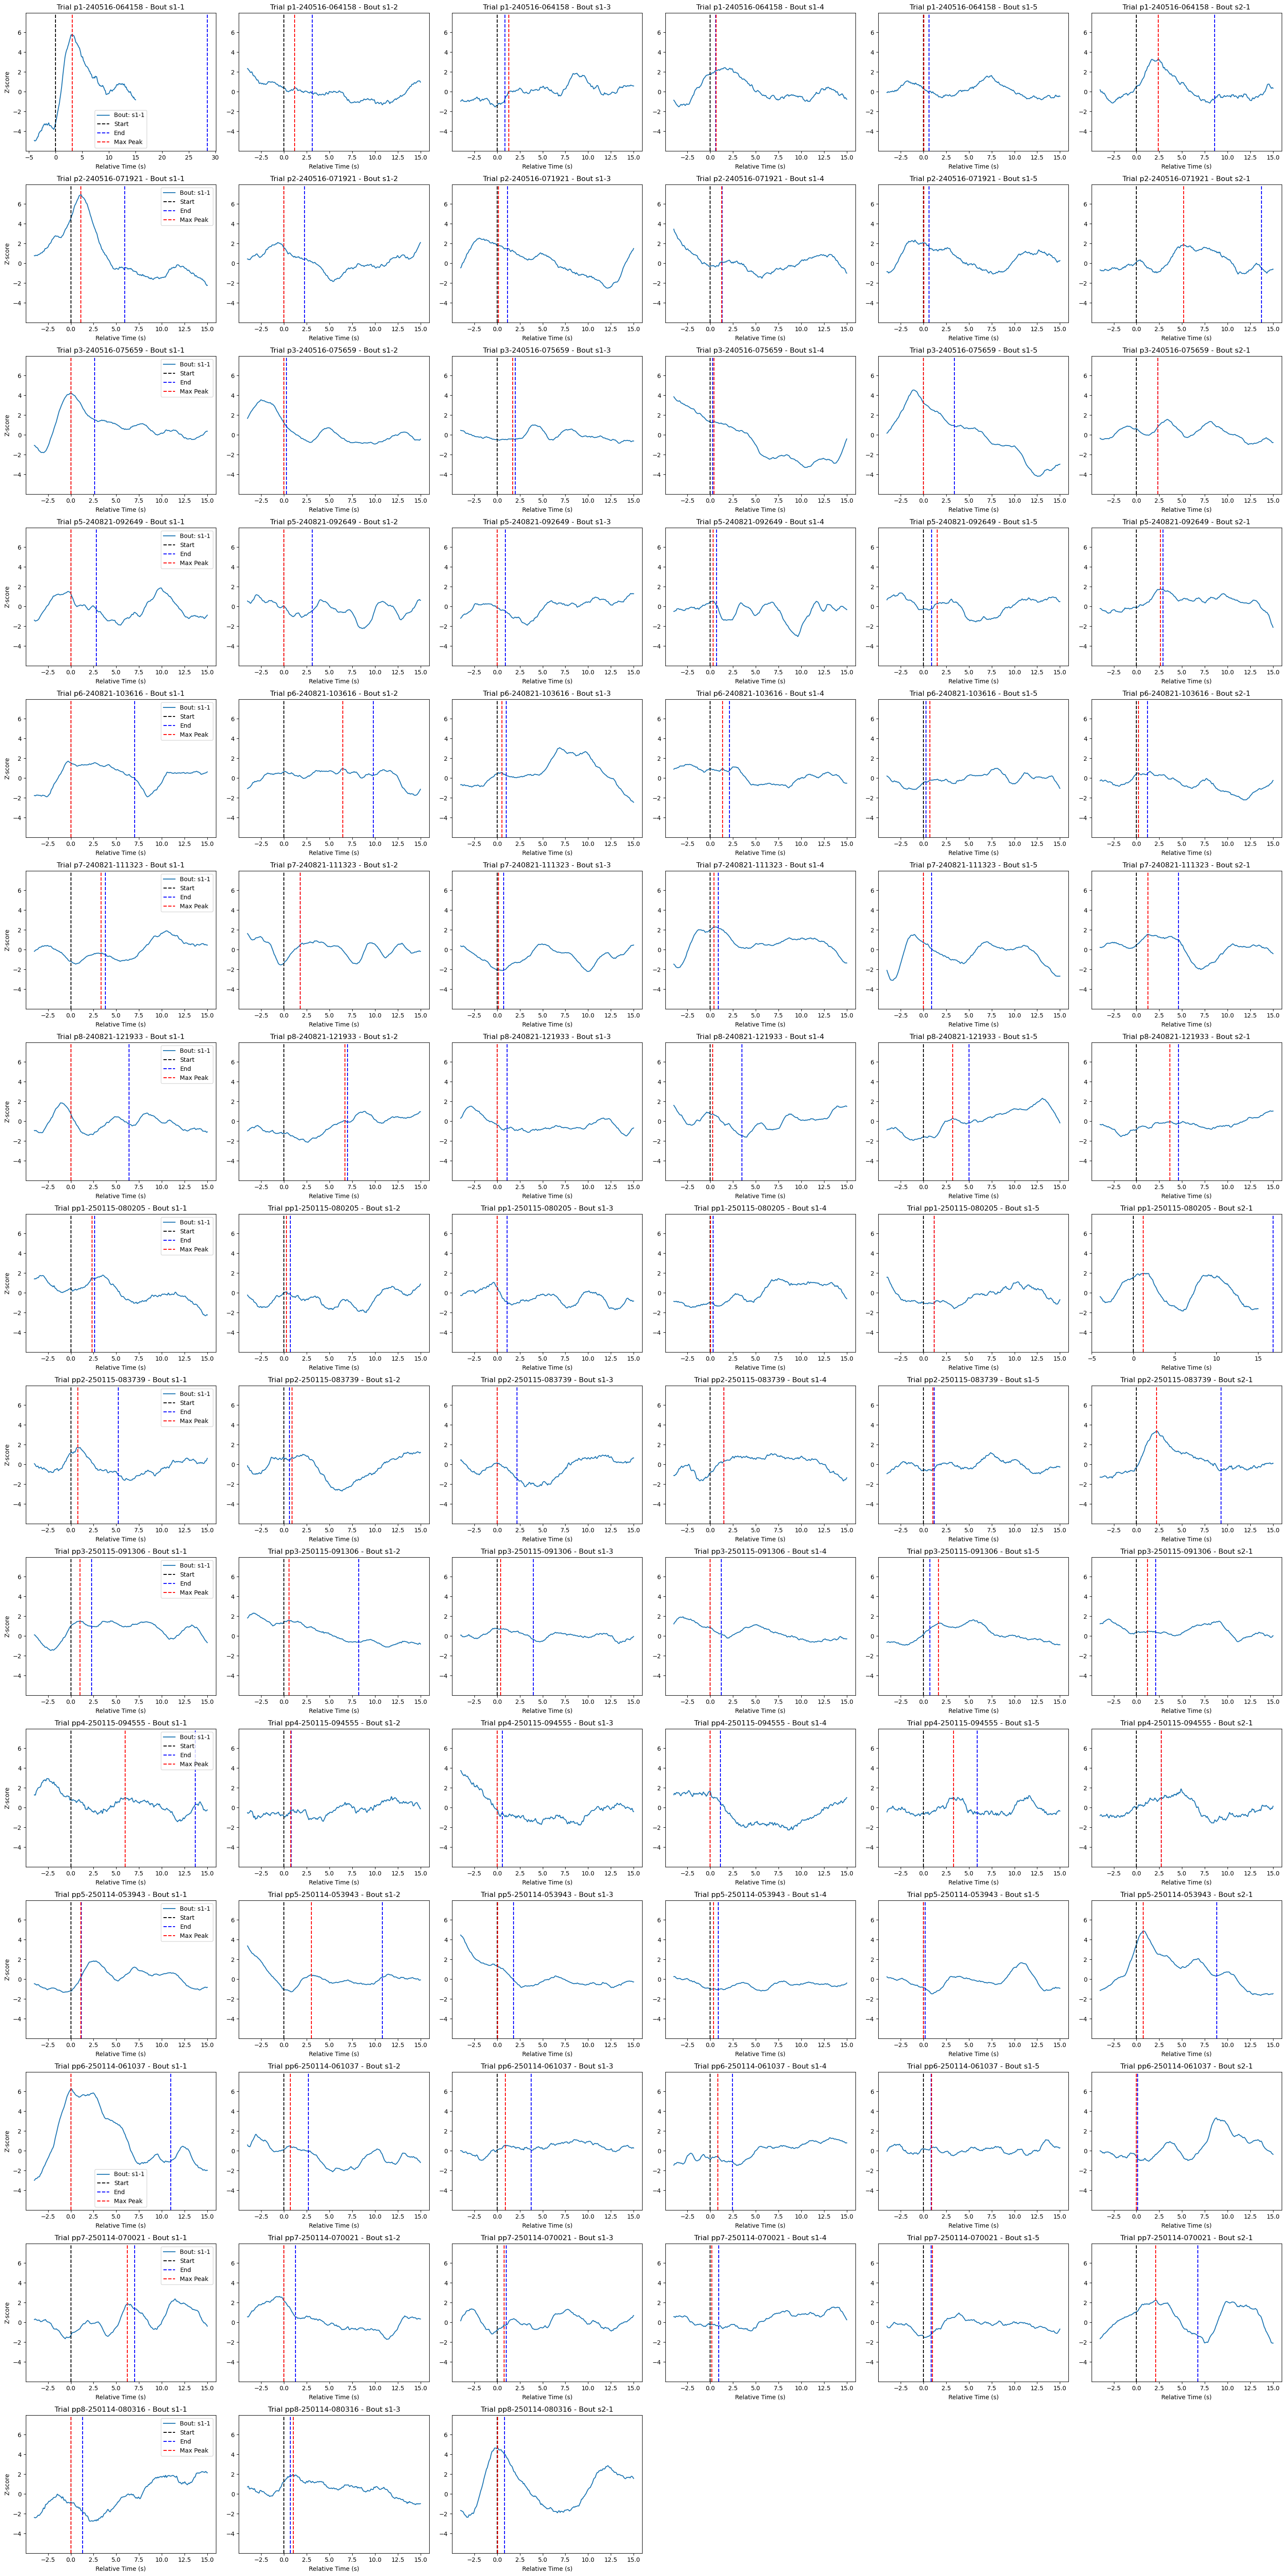

In [10]:
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']
experiment.plot_first_behavior_PETHs(selected_bouts=desired_bouts)

### Looking at individual trial

In [11]:
# df = experiment.trials['nn2-250115-054951'].behaviors
# df = experiment.trials['nn3-250115-064154'].behaviors
# print(df['Event_Zscore'])
# df.plot_first_behavior_PETHs()
# df.head()

PETH

In [12]:
# # 1. Filter to only 'Investigation' rows
# df_invest = df[df["Behavior"] == "Investigation"].copy()

# # 2. Identify the first investigation of each bout.
# #    - If your "Bout" column is already something like 's1-1', 's1-2', etc., you can group by it directly.
# #    - Then select the first row in each group (based on order in df).
# df_first_invest = df_invest.groupby("Bout", as_index=False).first()

# # Number of plots equals the number of first investigations
# n_plots = len(df_first_invest)

# # Create side-by-side subplots
# fig, axes = plt.subplots(1, n_plots, figsize=(5*n_plots, 4), sharey=True)

# # If only one bout, make axes iterable
# if n_plots == 1:
#     axes = [axes]

# for i, (_, row) in enumerate(df_first_invest.iterrows()):
#     ax = axes[i]
    
#     # Extract arrays for plotting
#     x = row["Relative_Time_Axis"]  
#     y = row["Relative_Zscore"]  
    
#     # Plot main investigation trace
#     ax.plot(x, y, label=f"Bout: {row['Bout']}")

#     # Dashed black line at investigation start (x=0)
#     ax.axvline(x=0, color='black', linestyle='--', label="Investigation Start")

#     # Dashed blue line at investigation end (x = duration)
#     end_time = row["Duration (s)"]
#     ax.axvline(x=end_time, color='blue', linestyle='--', label="Investigation End")

#     # Dashed red line at time of max peak
#     max_peak_time = row["Time of Max Peak"]
#     ax.axvline(x=max_peak_time, color='red', linestyle='--', label="Time of Max Peak")

#     # Keep Y-limits consistent
#     ax.set_ylim([-2.5, 14])

#     # Titles and labels
#     ax.set_title(f"Bout {row['Bout']}")
#     ax.set_xlabel("Relative Time (s)")

# # Common Y-axis label
# axes[0].set_ylabel("Z-score")

# # Optional legend handling (show only in the first subplot)
# axes[0].legend()

# plt.tight_layout()
# plt.show()


In [13]:
# For all subjects, plot PETH of both standard and relative for first investigation and second investigation
# Look at PETH for all combined
# Look into peak and trough thing. Does it make a difference in the bar plots?

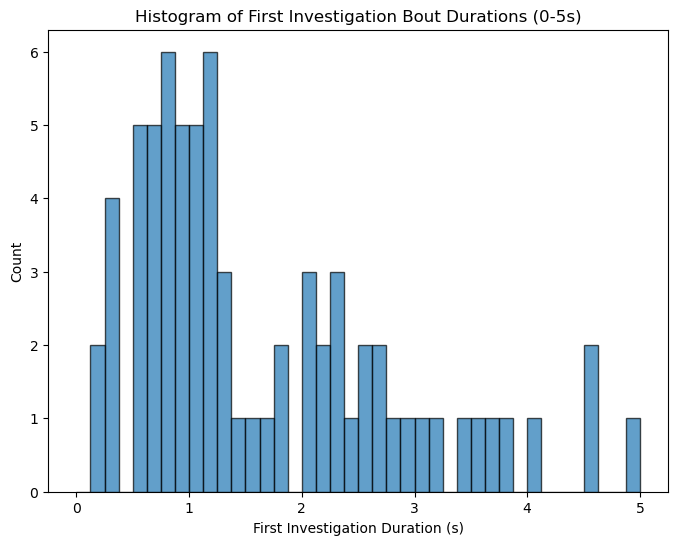

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Collect first investigation durations from all trials
first_investigation_durations = []

for trial_name, trial in experiment.trials.items():
    if hasattr(trial, 'behaviors') and not trial.behaviors.empty:
        # Filter only the first investigation per bout
        first_investigations = (
            trial.behaviors[trial.behaviors["Behavior"] == "Investigation"]
            .sort_values("Event_Start")
            .groupby("Bout", as_index=False)
            .first()
        )

        # Compute duration
        durations = first_investigations["Event_End"] - first_investigations["Event_Start"]
        first_investigation_durations.extend(durations.tolist())

# Convert to NumPy array for safety and filter between 0-5s
first_investigation_durations = np.array(first_investigation_durations)
filtered_durations = first_investigation_durations[
    (first_investigation_durations >= 0) & (first_investigation_durations <= 5)
]

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(filtered_durations, bins=40, range=(0, 5), edgecolor='black', alpha=0.7)
plt.xlabel("First Investigation Duration (s)")
plt.ylabel("Count")
plt.title("Histogram of First Investigation Bout Durations (0-5s)")
plt.show()
